<div style="text-align: center;">
    <h2>SMS Spam Detection</h2>
</div>

In today’s society, practically everyone has a mobile phone, and they all get communications (SMS/ email) on their phone regularly. But the essential point is that majority of the messages received will be spam, with only a few being ham or necessary communications. Scammers create fraudulent text messages to deceive us into giving them our personal information, such as our password, account number, or Social Security number. If they have such information, they may be able to gain access to our email, bank, or other accounts.

In this project, I am going to develop various deep learning models using Tensorflow for SMS spam detection and also analyze the performance metrics of different models.


In [18]:
#Importing all the necessary libraries required for the analysis 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

In [19]:
#Loading the data
spam_df=pd.read_csv("C:/Users/Kankana Ghosh/Desktop/Dataset/spam.csv",encoding="Latin1")
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
row,column=spam_df.shape
print(f"The dataset contains {row} rows and {column} columns.")

The dataset contains 5572 rows and 5 columns.


As we can see that the dataset contains three unnamed columns with null values. So we drop those columns and rename the columns v1 and v2 to label and Text, respectively. Since the target variable (v2) is in string form, we will encode it numerically using pandas function .map().

In [20]:
spam_df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [21]:
(spam_df.isnull()).sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
spam_df = spam_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
spam_df = spam_df.rename(columns={'v1':'label','v2':'Text'})
spam_df['label_enc'] = spam_df['label'].map({'ham':0,'spam':1})
spam_df.head()

,label,Text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Now the SMS Spam Detection Dataset, contains SMS text and corresponding label (Ham '0' or spam '1')

### Data Visualization

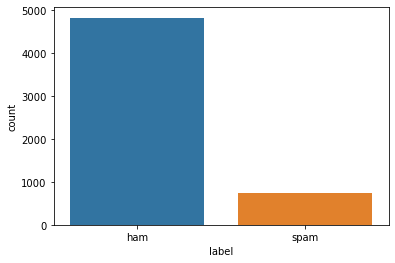

In [4]:
sns.countplot(x=spam_df['label'])
plt.show()

The ham data is comparatively higher than spam data, it’s natural. Since we are going to use embeddings in our deep learning model, we need not balance the data. 

Now, let’s find the average number of words in all the sentences in SMS data.

In [12]:
# Find average number of tokens in all sentences
avg_words_len=round(sum([len(i.split()) for i in spam_df['Text']])/len(spam_df['Text']))
print("The average number of words in all the sentences is:",avg_words_len)

The average number of words in all the sentences is: 15


In [13]:
# Finding Total no of unique words in corpus
s = set()
for sent in spam_df['Text']:
    for word in sent.split():
        s.add(word)
total_words_length=len(s)
print("The total number of unique words is:",total_words_length)

The total number of unique words is: 15585


Splitting the data into training and testing parts in 80:20 ratio.

In [14]:
# Splitting data for Training and testing
from sklearn.model_selection import train_test_split
 
X, y = np.asanyarray(spam_df['Text']), np.asanyarray(spam_df['label_enc'])
new_df = pd.DataFrame({'Text': X, 'label': y})
X_train, X_test, y_train, y_test = train_test_split(
    new_df['Text'], new_df['label'], test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4457,), (4457,), (1115,), (1115,))

### Model Building 

First, we build a baseline model and then try to beat the performance of the baseline model using deep learning models (embeddings, LSTM, etc)

Here, we choose Multinomial Naive Bayes classifier, which performs well for text classification when the features are discrete like word counts of the words or tf-idf vectors. The tf-idf is a measure that tells how important or relevant a word is the document.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score
 
tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec,X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)
 
baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)

MultinomialNB()

In [16]:
#Performance of baseline model
nb_accuracy=accuracy_score(y_test,baseline_model.predict(X_test_vec))
print("The accuracy of the model is:",round(nb_accuracy,3))
print(classification_report(y_test,baseline_model.predict(X_test_vec)))

The accuracy of the model is: 0.962
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



Precision:
For class 0 (ham class), the precision is 0.96. This means that out of all the instances the model predicted as ham class, 96% of them were actually spam class, while 4% were misclassified as ham class.
For class 1 (spam class), the precision is 1.00. This indicates that all instances predicted as class 1 were actually class 1.

Recall:
For ham class, the recall is 1.00. This means that the model correctly identified all instances of ham class out of the total instances of ham class.
For spam class, the recall is 0.72. This indicates that the model identified 72% of the instances of spam class, while it missed 28% of them.

F1-Score:
For ham class, the F1-score is 0.98. The F1-score is the harmonic mean of precision and recall, providing a balance between the two. It's a measure of a model's accuracy for ham class.
For spam class, the F1-score is 0.84. This indicates the model's accuracy for spam class.

Support:
For ham class, there are 965 instances in the dataset.
For spam class, there are 150 instances in the dataset.

Accuracy:
The overall accuracy of the model is 96%, which means it correctly predicted the class for 96% of the instances in the entire dataset.

Macro Avg:
The macro average calculates the average of precision, recall, and F1-score for both classes, giving equal weight to each class. In this case, it's showing an average precision of 0.98, an average recall of 0.86, and an average F1-score of 0.91.

Weighted Avg:
The weighted average also calculates the average of precision, recall, and F1-score for both classes, but it takes into account the number of instances in each class. It provides a measure of overall performance, considering class imbalances. In this case, it's showing a weighted average precision of 0.96, a weighted average recall of 0.96, and a weighted average F1-score of 0.96.

Overall, the model appears to perform well with high precision and recall for ham class, but it has a lower recall for spam class, which indicates it might struggle to correctly identify instances of spam class.


### Confusion matrix for the baseline model 

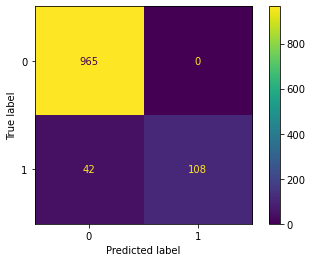

In [10]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(baseline_model,X_test_vec,y_test)

### Model 1: Creating custom Text vectorization and embedding layers:

Text vectorization is the process of converting text into a numerical representation. Example: Bag of words frequency, Binary Term frequency, etc.

A word embedding is a learned representation of text in which words with related meanings have similar representations. Each word is assigned to a single vector, and the vector values are learned like that of a neural network.

Now, we create a custom text vectorization layer using TensorFlow.

In [11]:
from tensorflow.keras.layers import TextVectorization
 
MAXTOKENS=total_words_length
OUTPUTLEN=avg_words_len
 
text_vec = TextVectorization(
    max_tokens=MAXTOKENS,
    standardize='lower_and_strip_punctuation',
    output_mode='int',
    output_sequence_length=OUTPUTLEN
)
text_vec.adapt(X_train)

In [12]:
embedding_layer = layers.Embedding(input_dim=MAXTOKENS, output_dim=128,
    embeddings_initializer='uniform', input_length=OUTPUTLEN)

MAXTOKENS is the maximum size of the vocabulary which was found earlier.
OUTPUTLEN is the length to which the sentences should be padded irrespective of the sentence length.
input_dim is the size of vocabulary.
output_dim is the dimension of the embedding layer i.e, the size of the vector in which the words will be embedded.
input_length is the length of input sequences.
Now, building and compiling model 1 using the Tensorflow Functional API.

In [13]:
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
x = layers.GlobalAveragePooling1D()(embedding_layer_model)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model_1 = keras.Model(input_layer, output_layer)
 
model_1.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(
    label_smoothing=0.5), metrics=['accuracy'])

In [14]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 15, 128)           1994880   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128  

In [15]:
history_1=model_1.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),validation_steps=int(0.2*len(X_test)))

Epoch 1/5
140/140 [==============================] - 8s 40ms/step - loss: 0.6057 - accuracy: 0.9053 - val_loss: 0.5766 - val_accuracy: 0.9776
Epoch 2/5
140/140 [==============================] - 5s 36ms/step - loss: 0.5698 - accuracy: 0.9883 - val_loss: 0.5734 - val_accuracy: 0.9839
Epoch 3/5
140/140 [==============================] - 5s 35ms/step - loss: 0.5655 - accuracy: 0.9966 - val_loss: 0.5725 - val_accuracy: 0.9830
Epoch 4/5
140/140 [==============================] - 5s 34ms/step - loss: 0.5641 - accuracy: 0.9984 - val_loss: 0.5729 - val_accuracy: 0.9812
Epoch 5/5
140/140 [==============================] - 5s 35ms/step - loss: 0.5634 - accuracy: 0.9989 - val_loss: 0.5727 - val_accuracy: 0.9785


<AxesSubplot:>

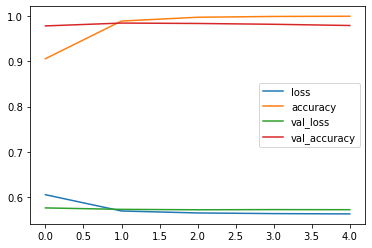

In [16]:
pd.DataFrame(history_1.history).plot()

Creating helper functions for compiling, fitting, and evaluating the model performance.

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score
 
def compile_model(model):
    '''
    simply compile the model with adam optimzer
    '''
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
 
def fit_model(model, epochs, X_train=X_train, y_train=y_train,
              X_test=X_test, y_test=y_test):
    '''
    fit the model with given epochs, train
    and test data
    '''
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        validation_data=(X_test, y_test),
                        validation_steps=int(0.2*len(X_test)))
    return history
 
def evaluate_model(model, X, y):
    '''
    evaluate the model and returns accuracy,
    precision, recall and f1-score
    '''
    y_preds = np.round(model.predict(X))
    accuracy = accuracy_score(y, y_preds)
    precision = precision_score(y, y_preds)
    recall = recall_score(y, y_preds)
    f1 = f1_score(y, y_preds)
 
    model_results_dict = {'accuracy': accuracy,
                          'precision': precision,
                          'recall': recall,
                          'f1-score': f1}
 
    return model_results_dict

### Model -2 Bidirectional LSTM

A bidirectional LSTM (Long short-term memory) is made up of two LSTMs, one accepting input in one direction and the other in the other. BiLSTMs effectively improve the network’s accessible information, boosting the context for the algorithm (e.g. knowing what words immediately follow and precede a word in a sentence).

Building and compiling the model-2

In [18]:
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
bi_lstm = layers.Bidirectional(layers.LSTM(
    64, activation='tanh', return_sequences=True))(embedding_layer_model)
lstm = layers.Bidirectional(layers.LSTM(64))(bi_lstm)
flatten = layers.Flatten()(lstm)
dropout = layers.Dropout(.1)(flatten)
x = layers.Dense(32, activation='relu')(dropout)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model_2 = keras.Model(input_layer, output_layer)
 
compile_model(model_2)  # compile the model
history_2 = fit_model(model_2, epochs=5)  # fit the model

Epoch 1/5
140/140 [==============================] - 27s 90ms/step - loss: 0.0723 - accuracy: 0.9744 - val_loss: 0.0843 - val_accuracy: 0.9830
Epoch 2/5
140/140 [==============================] - 9s 67ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0967 - val_accuracy: 0.9767
Epoch 3/5
140/140 [==============================] - 9s 67ms/step - loss: 3.9815e-04 - accuracy: 0.9998 - val_loss: 0.1199 - val_accuracy: 0.9812
Epoch 4/5
140/140 [==============================] - 9s 66ms/step - loss: 3.2401e-05 - accuracy: 1.0000 - val_loss: 0.1302 - val_accuracy: 0.9812
Epoch 5/5
140/140 [==============================] - 9s 66ms/step - loss: 1.4879e-05 - accuracy: 1.0000 - val_loss: 0.1360 - val_accuracy: 0.9812


### Model -3 Transfer Learning with USE Encoder

Transfer Learning:

Transfer learning is a machine learning approach in which a model generated for one job is utilized as the foundation for a model on a different task.

USE Layer (Universal Sentence Encoder):

The Universal Sentence Encoder converts text into high-dimensional vectors that may be used for text categorization, semantic similarity, and other natural language applications.

In [36]:
import tensorflow_hub as hub
import tensorflow as tf
 
# model with Sequential api
model_3 = keras.Sequential()
 
# universal-sentence-encoder layer
# directly from tfhub

#use_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",trainable=False,input_shape=[],
                           #dtype=tf.string,name='USE')
import tarfile

# Replace 'path/to/your/file.tar.gz' with the actual path to your tar.gz file
model_path="C:/Users/Kankana Ghosh/Desktop/Dataset/universal-sentence-encoder_4.tar.gz"

# Step 1: Open the tar.gz file in read mode
with tarfile.open(model_path, 'r:gz') as tar:
    # Step 2: Extract all files from the tar.gz archive
    ext=tar.extractall(path="C:/Users/Kankana Ghosh/Desktop/Dataset")


In [55]:
from tensorflow.keras import layers

# Update the path to the directory containing the USE model
use_model_path = 'C:/Users/Kankana Ghosh/Desktop/Dataset/'

# Load the Universal Sentence Encoder model with the 'serving_default' signature
use_layer = hub.KerasLayer(use_model_path, trainable=False, input_shape=[], dtype=tf.string, name='USE', 
                           signature='serving_default',signature_outputs_as_dict=True)

# Create the model
model_3 = tf.keras.Sequential()
model_3.add(use_layer)
model_3.add(layers.Dropout(0.2))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model (assuming compile_model() is correctly implemented)
compile_model(model_3)

# Fit the model (assuming fit_model() is correctly implemented)
history_3 = fit_model(model_3, epochs=5)







Epoch 1/5
140/140 [==============================] - 5s 24ms/step - loss: 0.2937 - accuracy: 0.9181 - val_loss: 0.1153 - val_accuracy: 0.9677
Epoch 2/5
140/140 [==============================] - 2s 17ms/step - loss: 0.0812 - accuracy: 0.9796 - val_loss: 0.0704 - val_accuracy: 0.9767
Epoch 3/5
140/140 [==============================] - 2s 17ms/step - loss: 0.0589 - accuracy: 0.9834 - val_loss: 0.0578 - val_accuracy: 0.9794
Epoch 4/5
140/140 [==============================] - 2s 16ms/step - loss: 0.0447 - accuracy: 0.9879 - val_loss: 0.0525 - val_accuracy: 0.9839
Epoch 5/5
140/140 [==============================] - 2s 17ms/step - loss: 0.0424 - accuracy: 0.9877 - val_loss: 0.0496 - val_accuracy: 0.9830


### Analyzing our Model Performance

In [56]:
baseline_model_results = evaluate_model(baseline_model, X_test_vec, y_test)
model_1_results = evaluate_model(model_1, X_test, y_test)
model_2_results = evaluate_model(model_2, X_test, y_test)
model_3_results = evaluate_model(model_3, X_test, y_test)
 
total_results = pd.DataFrame({'MultinomialNB Model':baseline_model_results,
                             'Custom-Vec-Embedding Model':model_1_results,
                             'Bidirectional-LSTM Model':model_2_results,
                             'USE-Transfer learning Model':model_3_results}).transpose()
 
total_results

35/35 [==============================] - 1s 9ms/step


,accuracy,precision,recall,f1-score
MultinomialNB Model,0.962332,1.000000,0.720000,0.837209
Custom-Vec-Embedding Model,0.981166,0.977778,0.880000,0.926316
Bidirectional-LSTM Model,0.981166,0.964029,0.893333,0.927336
USE-Transfer learning Model,0.982960,0.951724,0.920000,0.935593


<AxesSubplot:>

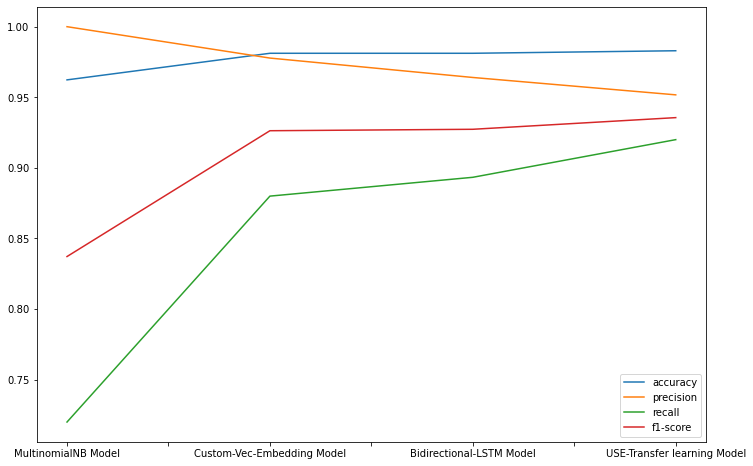

In [58]:
total_results.plot(figsize=(12, 8))

In [57]:
total_results.sort_values('f1-score', ascending=False)

,accuracy,precision,recall,f1-score
USE-Transfer learning Model,0.982960,0.951724,0.920000,0.935593
Bidirectional-LSTM Model,0.981166,0.964029,0.893333,0.927336
Custom-Vec-Embedding Model,0.981166,0.977778,0.880000,0.926316
MultinomialNB Model,0.962332,1.000000,0.720000,0.837209


1. USE-Transfer learning Model:

Accuracy: The model achieved an accuracy of approximately 98.30%, indicating it made correct predictions for the majority of instances in the dataset.
Precision: The precision for this model is around 95.17%. Out of the instances predicted as positive, about 95.17% were truly positive, while the remaining 4.83% were false positives.
Recall: The recall is approximately 92.00%. The model correctly identified 92.00% of the actual positive instances.
F1-Score: The F1-score is approximately 93.56%, which is a balanced measure of precision and recall.

2. Bidirectional-LSTM Model:

Accuracy: This model achieved an accuracy of approximately 98.12%, similar to the first model.
Precision: The precision is around 96.40%. This indicates that out of the instances predicted as positive, about 96.40% were truly positive.
Recall: The recall is approximately 89.33%. The model identified 89.33% of the actual positive instances.
F1-Score: The F1-score is approximately 92.73%, indicating the balance between precision and recall.

3. Custom-Vec-Embedding Model:

Accuracy: Similar to the previous models, this model achieved an accuracy of approximately 98.12%.
Precision: The precision is quite high at around 97.78%, indicating accurate positive predictions.
Recall: The recall is approximately 88.00%. The model captured 88.00% of the actual positive instances.
F1-Score: The F1-score is approximately 92.63%, again reflecting a balance between precision and recall.

4. MultinomialNB Model:
    
Accuracy: This model achieved an accuracy of approximately 96.23%, which is slightly lower than the other models.
Precision: The precision is perfect at 100.00%, indicating that all instances predicted as positive were indeed positive.
Recall: The recall is around 72.00%. The model captured only 72.00% of the actual positive instances, indicating some difficulty in identifying positives.
F1-Score: The F1-score is approximately 83.72%, which reflects the trade-off between precision and recall.
In summary, all models have high accuracy rates, but they differ in precision, recall, and F1-scores. The "MultinomialNB Model" has the highest precision but struggles with recall. The "USE-Transfer learning Model," "Bidirectional-LSTM Model," and "Custom-Vec-Embedding Model" exhibit good trade-offs between precision and recall. The choice of model may depend on the specific requirements of the task, such as the importance of precision and recall in the context of the application.







### Conclusion

Metrics:All four models deliver excellent results. (All of them have greater than 96 percent accuracy), thus comparing them might be difficult.

Problem:We have an unbalanced dataset; most of our data points contain the label “ham,” which is natural because most SMS are ham. Accuracy cannot be an appropriate metric in certain situations. Other measurements are required.

Which metric is better?
False negative and false positive are significant in this problem. Precision and recall are the metrics that allow us the ability to calculate them, but there is one more, ‘f1-score.’
The f1-score is the harmonic mean of accuracy and recall. Thus, we can get both with a single shot.
USE-Transfer learning model gives the best accuracy and f1-score.